In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def h(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y = (np.cos(50 * x) + np.sin(20 * x))
    return y


hv = np.vectorize(h)
hv


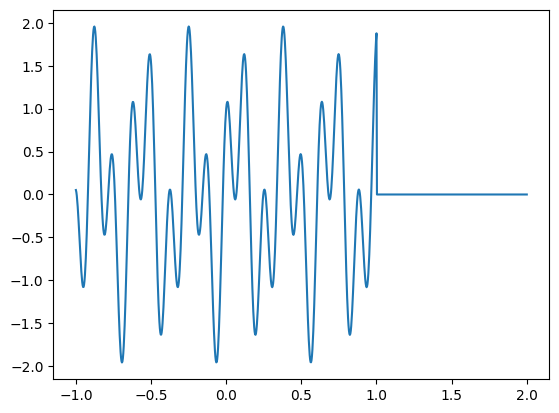

In [3]:
X = np.linspace(-1, 2, num=1_000)
plt.plot(X, hv(X))

In [4]:
def simple_greedy_search(func, start=0, N=100):
    x = start
    history = []
    for i in range(N):
        history.append(x)  # keep track of steps
        u = .001  #np.random.rand() #some noise
        xleft, xright = x - u, x + u
        yleft, yright = func(xleft), func(xright)
        if yleft > yright:
            x = xleft
        else:
            x = xright
    return x, history

In [5]:
x0, history = simple_greedy_search(hv, start=-.02, N=100)
x0, history

(0.00800000000000001,
 [-0.02,
  -0.019,
  -0.018,
  -0.016999999999999998,
  -0.015999999999999997,
  -0.014999999999999996,
  -0.013999999999999995,
  -0.012999999999999994,
  -0.011999999999999993,
  -0.010999999999999992,
  -0.009999999999999992,
  -0.00899999999999999,
  -0.00799999999999999,
  -0.00699999999999999,
  -0.00599999999999999,
  -0.00499999999999999,
  -0.00399999999999999,
  -0.0029999999999999897,
  -0.0019999999999999896,
  -0.0009999999999999896,
  1.0408340855860843e-17,
  0.0010000000000000104,
  0.0020000000000000104,
  0.0030000000000000105,
  0.0040000000000000105,
  0.0050000000000000105,
  0.0060000000000000105,
  0.0070000000000000106,
  0.00800000000000001,
  0.009000000000000011,
  0.00800000000000001,
  0.009000000000000011,
  0.00800000000000001,
  0.009000000000000011,
  0.00800000000000001,
  0.009000000000000011,
  0.00800000000000001,
  0.009000000000000011,
  0.00800000000000001,
  0.009000000000000011,
  0.00800000000000001,
  0.00900000000000001

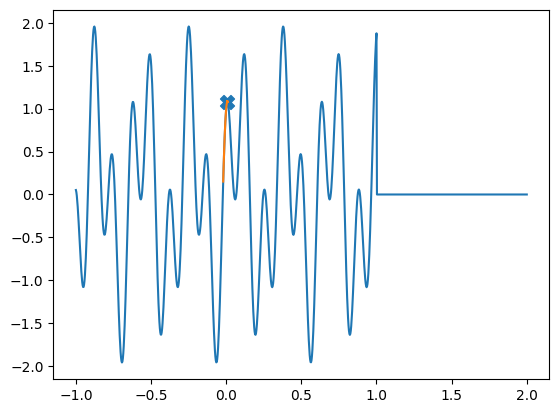

In [6]:
plt.plot(X, hv(X))
plt.scatter(x0, h(x0), marker='X', s=100)
plt.plot(history, hv(history))

In [11]:
def SA(search_space, func, T):
    scale = np.sqrt(T)
    start = np.random.choice(search_space)
    x = start * 1
    cur = func(x)
    history_ = [x]
    for i in range(1000):
        prop = x + np.random.normal() * scale  # .uniform(-1,1,size=1) * scale
        if prop > 1 or prop < 0 or np.log(np.random.rand()) * T > (func(prop) - cur):
            prop = x
        x = prop
        cur = func(x)
        T = .9 * T # reduce temperature by 10% each iteration
        history_.append(x)
    return x, history_


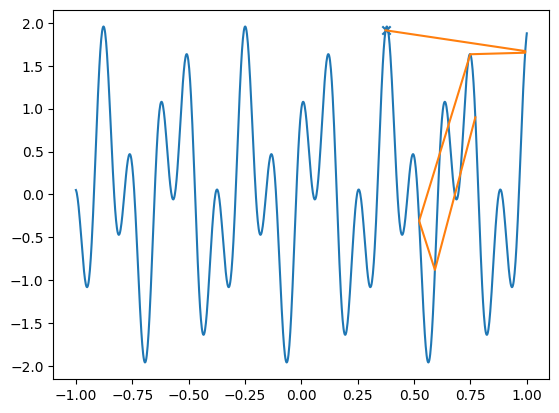

In [23]:
X = np.linspace(-1, 1, num=1000)
x1, history = SA(X, h, T=4)

plt.plot(X, hv(X))
plt.scatter(x1, hv(x1), marker="x")
plt.plot(history, hv(history))

In [24]:
h(history[-1])

1.9130896961296484